# Разведочный анализ данных

Это задание посвящено изучению данных и построению различных визуализаций.  
Наша цель - провести **разведочный анализ данных**, чтобы исследовать поведение данных и выявить в них закономерности.

Мы будем работать с датассетом пассажиров [Титаника](https://en.wikipedia.org/wiki/Titanic).

Классическая задача, решаемая на этих данных: предсказать, выжил пассажир или нет по его характеристикам.  
То есть целевая переменная - столбец `Survived`.

Цели:
* познакомиться с библиотекой `seaborn`
* научиться делать различные визуализации
* заполнять пропуски в данных
* делать однофакторный анализ
* конструировать новые признаки

Бонус:
* придумаем свою модель на основе проведенного анализа и оценим ее качество.

## Подключение библиотек и загрузка данных

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import warnings
warnings.simplefilter('ignore')



Фиксируем `random_state` для воспроизводимости случайных значений.

In [2]:
RANDOM_STATE = 42

Загрузим данные.

In [3]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/evgpat/edu_stepik_practical_ml/main/datasets/titanik.csv",
    sep=";"
    )

**Описание признаков**

- `Survived` — выжил данный пассажир или нет (*0* для умерших, *1* для выживших)
- `Pclass` — класс пассажира (*1* — высший, *2* — средний, *3* — низший)
- `Name` — имя
- `Sex` — пол
- `Age` — возраст
- `SibSp` — количество братьев, сестер, сводных братьев, сводных сестер, супругов на борту титаника
- `Parch` — количество родителей, детей (в том числе приемных) на борту титаника
- `Ticket` — номер билета
- `Fare` — плата за проезд
- `Cabin` — каюта
- `Embarked` — порт посадки (*C* — Шербур; *Q* — Квинстаун; *S* — Саутгемптон)

## Обзор данных

Посмотрим на *5* случайных объектов из датасета.

In [4]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
265,266,0,2,Reeves; Mr. David,male,36.0,0,0,C.A. 17248,10.5000,NaN,S
713,714,0,3,Larsson; Mr. August Viktor,male,29.0,0,0,7545,9.4833,NaN,S
847,848,0,3,Markoff; Mr. Marin,male,35.0,0,0,349213,7.8958,NaN,C
726,727,1,2,Renouf; Mrs. Peter Henry (Lillian Jefferys),female,30.0,3,0,31027,21.0000,NaN,S
825,826,0,3,Flynn; Mr. John,male,NaN,0,0,368323,6.9500,NaN,Q


Выведите на экран размеры таблицы *Data*.

**Вопрос:** сколько объектов в данных?

In [5]:
# ваш код здесь
len(df)

891

## Обработка признаков и однофакторный анализ

На данном этапе:

1) Найдем признаки, у которых есть пропущенные значения и обработаем эти пропущенные значения

2) Переведём категориальные признаки в числовые

Выведем на экран основные числовые характеристики числовых столбцов.  
Это можно сделать при помощи функции `describe`.

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


В строке *count* отображается количество непропущенных значений в каждом столбце.

Основные статистики можно посмотреть и по категориальным колонкам.  
Для этого в функцию `describe` нужно передать аргумент `include='object'`.

Сделайте это.

In [7]:
df.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,3,681,147,3
top,Braund; Mr. Owen Harris,male,347082,B96 B98,S
freq,1,574,7,4,644


**Вопрос:** в скольких категориальных колонках есть пропуски? - 2

### Столбец Sex

В столбце пол (`Sex`) три различных значения. Посмотрим на них.

In [8]:
df['Sex'].value_counts()

male       574
female     312
unknown      5
Name: Sex, dtype: int64

Удалим пассажиров неизвестного пола, так как их всего *5*.

In [9]:
df = df[df['Sex'] != 'unknown']

Проверьте, что строки с неизвестным полом исчезли.

In [10]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            175
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          682
Embarked         2
dtype: int64

Признак `Sex` является категориальным, то есть содержит нечисловые значения. Для работы большинства алгоритмов необходимо переводить категории в числа.

Закодировать значения столбца с двумя категориями можно следующим образом. Пусть в воображаемом столбце *animal* есть два значения: *cat* и *dog*. Их можно перевести в *0* и *1* при помощи функции `map`:

`Data['animal'] = Data['animal'].map({'cat' : 1, 'dog' : 0})`


По аналогии закодируйте столбец `Sex` (*male* - *1*, *female* - *0*).

In [11]:
df['sex_code'] = df['Sex'].map({'male': 1, 'female': 0})

**Вопрос** посчитайте сумму значений в закодированном столбце `Sex`.

In [12]:
df['sex_code'].sum()

574

In [14]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sex_code
0,1,0,3,Braund; Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,Heikkinen; Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,Allen; Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S,1


Посмотрим, как влияет пол на выживаемость.

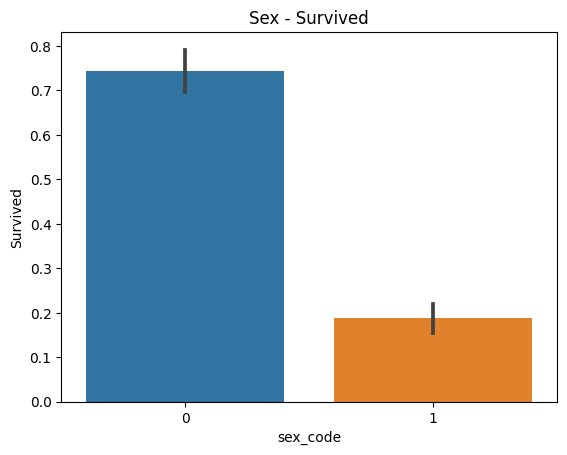

In [15]:
sns.barplot(x='sex_code', y='Survived', data=df)
plt.title('Sex - Survived')
plt.show()

Гистограмму можно детализировать, добавив значение параметра `hue`.

### Столбец Pclass

Нарисуйте гистограмму выживаемости в зависимости от `Pclass`.  
Используйте `barplot`.

<Axes: xlabel='Pclass', ylabel='Survived'>

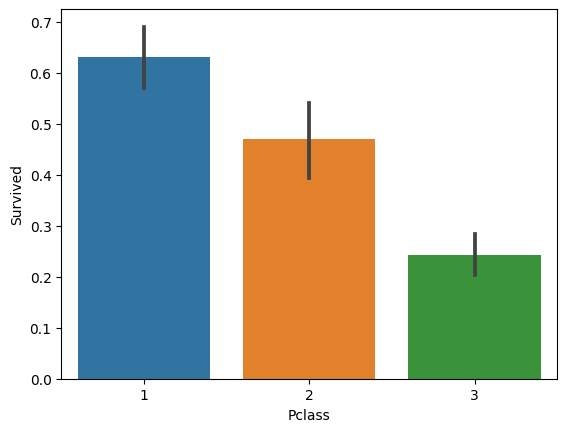

In [17]:
sns.barplot(x='Pclass', y='Survived', data=df)

**Вопрос:** пассажиры из какого класса выживали чаще всего?

Посмотрим, как влияет пол человека и класс билета (`Pclass`) на выживаемость

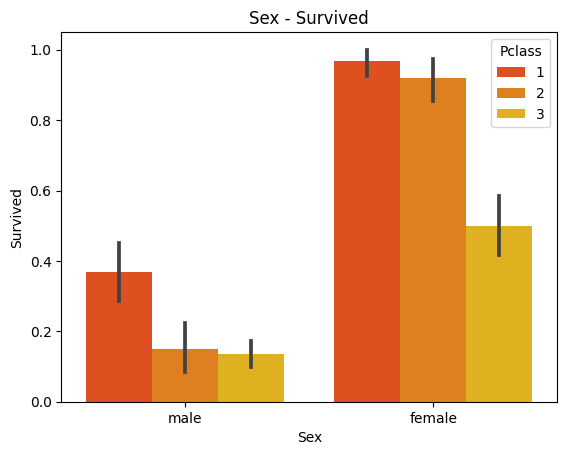

In [19]:
sns.barplot(x='Sex', y='Survived', hue='Pclass', data=df, palette='autumn')
plt.title('Sex - Survived')
plt.show();

### Столбец Embarked

**Вопрос** сколько различных значений принимает признак `Embarked`?

In [20]:
df['Embarked'].value_counts()

S    641
C    168
Q     75
Name: Embarked, dtype: int64

Пока что мы не обсуждали, как переводить в числа категориальные признаки с больше, чем двумя категориями.  
Поэтому давайте отбросим этот признак.

Сделайте это (вам пригодится метод [`drop`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html)).

In [24]:
df = df.drop('Embarked', axis=1)

### Столбец Age

Обработаем признак `Age`.

Мы помним, что в этом признаке много пропусков.

Заполним пропуски медианным значением `Age`.

In [25]:
median_age = df['Age'].median()

df['Age'].fillna(median_age, inplace=True)

Нарисуем распределение возраста пассажиров.

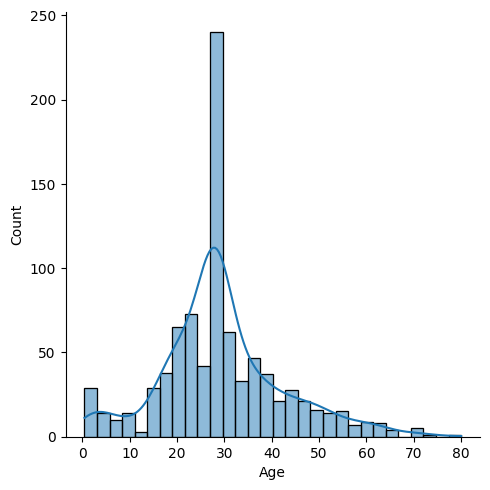

In [26]:
sns.displot(df['Age'], kde=True)
plt.show();

### Другие столбцы

Удалите признак `Fare`. Он сильно связан с признаком `Pclass`, поэтому нам не нужен.

In [27]:
df = df.drop('Fare', axis=1)

**Вопрос:** сколько на данный момент колонок в таблице `df`?

In [28]:
df.shape

(886, 11)

Столбец `PassengerId` является категориальным и не несёт важной информации, удалите его.

Столбцы `Ticket`, `Name` и `Cabin` в этот раз нам также не понадобятся. Удалите и их.

In [29]:
df = df.drop(['PassengerId', 'Ticket', 'Name', 'Cabin'], axis=1)

In [30]:
df = df.drop('Sex', axis=1)

После минимальной обработки данных у нас получилась следующая таблица:

In [31]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,sex_code
0,0,3,22.0,1,0,1
1,1,1,38.0,1,0,0
2,1,3,26.0,0,0,0
3,1,1,35.0,1,0,0
4,0,3,35.0,0,0,1


## Исследование признаков

Нарисуйте матрицу корреляций столбцов между собой.

In [34]:
df.corr()

,Survived,Pclass,Age,SibSp,Parch,sex_code
Survived,1.000000,-0.338447,-0.062245,-0.033743,0.085753,-0.545547
Pclass,-0.338447,1.000000,-0.342216,0.083148,0.015606,0.133972
Age,-0.062245,-0.342216,1.000000,-0.235465,-0.177241,0.081486
SibSp,-0.033743,0.083148,-0.235465,1.000000,0.422104,-0.114677
Parch,0.085753,0.015606,-0.177241,0.422104,1.000000,-0.259232
sex_code,-0.545547,0.133972,0.081486,-0.114677,-0.259232,1.000000


**Вопрос:** какой столбец сильнее всего коррелирует с целевой переменной `Survived`?

Посмотрим на попарные зависимости некоторых признаков.

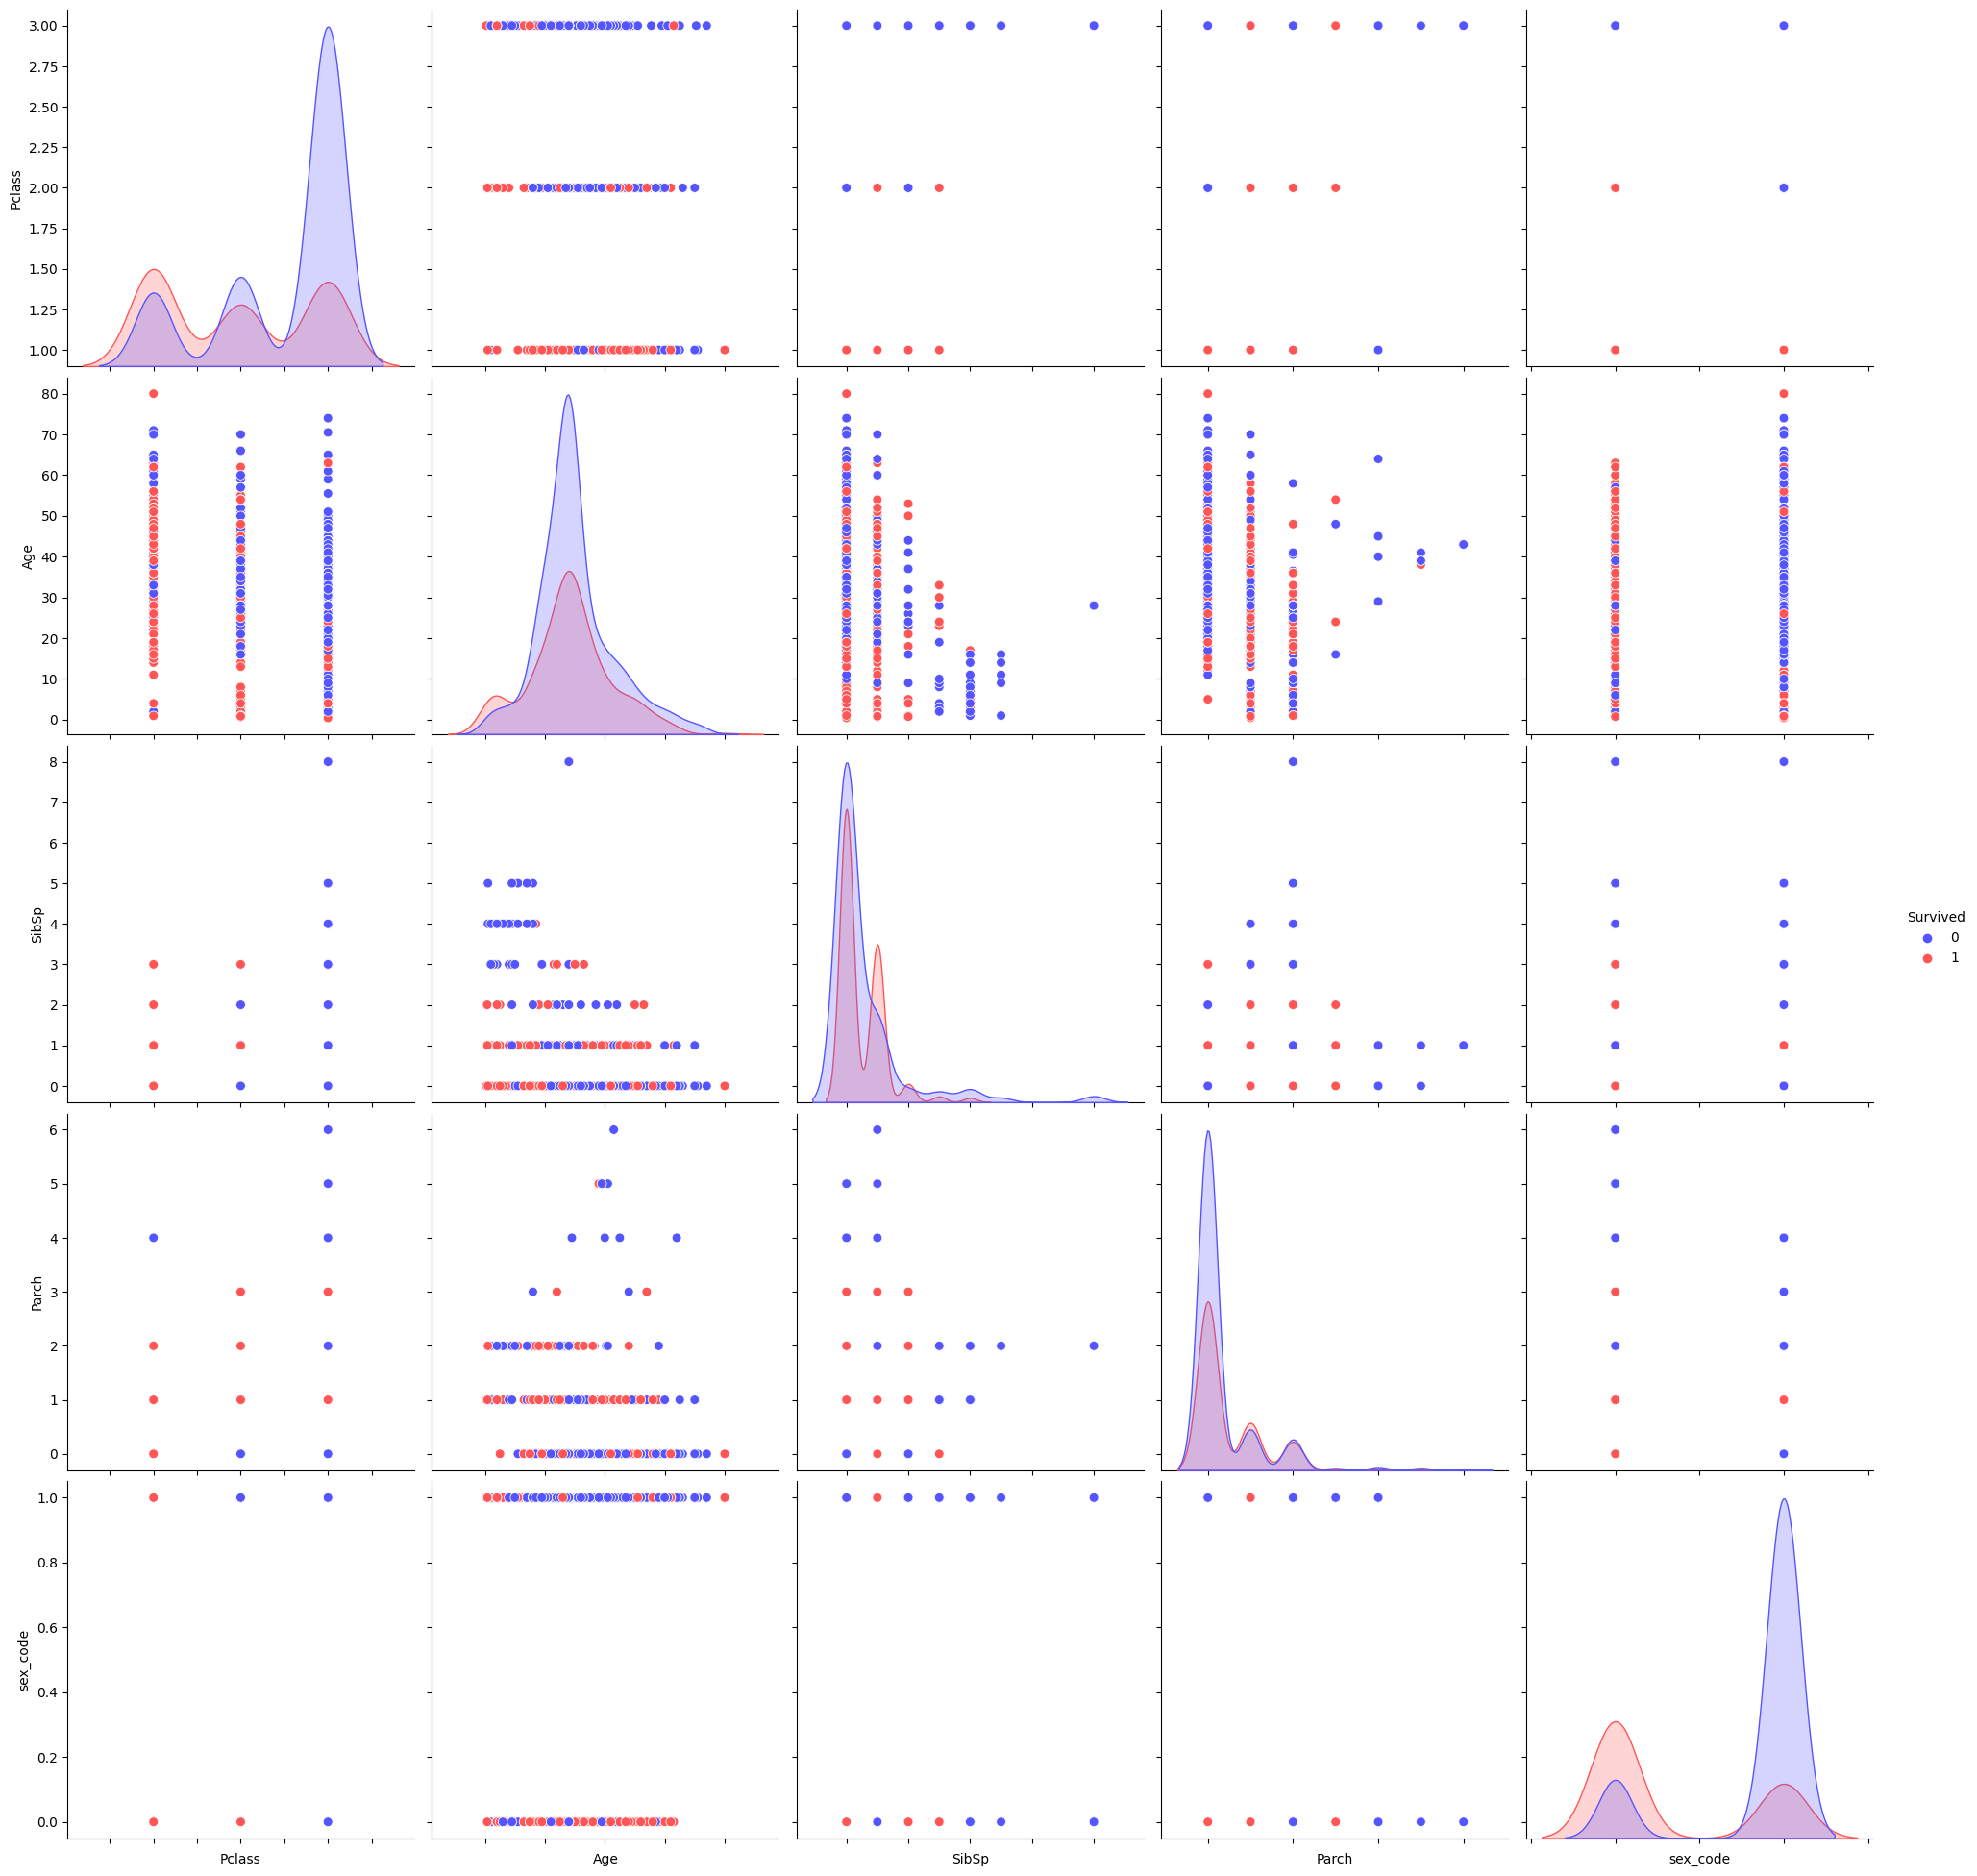

In [33]:
g = sns.pairplot(
    df,
    hue='Survived',
    palette = 'seismic',
    height=4,
    diag_kind = 'kde',
    diag_kws=dict(fill=True),
    plot_kws=dict(s=50)
    )

g.set(xticklabels=[]);

## Бонус (не проверяется)

Мы не используем всю информацию о данных, в частности, не используем текстовые данные. Также из матрицы корреляций мы видим, что признаки `Parch` и `SibSp` слабо коррелируют с выживаемостью (`Survived`). Можно сконструировать новые признаки, чтобы решить эти вопросы.

Попробуйте сделать следующее.

1) Создайте признак `NameLen` и запишите в него длину имени (`Name`).

2) Создайте признак `FamilySize`, равный *Parch + SibSp + 1*. Зачем добавлять 1?

3) Создайте признак `IsAlone`, который показывает, путешествовал человек один или с семьей.

In [60]:
df_dop = pd.read_csv(
    "https://raw.githubusercontent.com/evgpat/edu_stepik_practical_ml/main/datasets/titanik.csv",
    sep=";"
    )
df_dop.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund; Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen; Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Allen; Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S


In [61]:
df_dop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Посмотрите, как коррелируют новые признаки со столбцом `Survived`.

In [62]:
df_dop['NameLen'] = df_dop['Name'].apply(lambda x: len(x))
df_dop['FamilySize'] = df_dop['Parch'] + df_dop['SibSp'] + 1 # включая пассажира
df_dop['IsAlone'] = df_dop['FamilySize'].apply(lambda x: 1 if x == 1 else 0)

Можно извлечь и другую полезную информацию из данных путём конструирования новых признаков.

Придумайте ещё новые осмысленные признаки. Проверьте, как они коррелируют с выживаемостью.

In [63]:
df_dop['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [64]:
df_dop['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [65]:
df_dop = df_dop[df_dop['Sex'] != 'unknown']
df_dop['sex'] = df_dop['Sex'].apply(lambda x: 1 if x == 'male' else 0)

In [66]:
df_dop['has_chikd_par'] = df_dop['Parch'].apply(lambda x: 1 if x >= 1 else 0)
df_dop['has_other'] = df_dop['SibSp'].apply(lambda x: 1 if x >= 1 else 0)

In [67]:
df_dop['port'] = (df_dop['Embarked'].map(df_dop.groupby('Embarked')['Survived'].mean()))

In [68]:
df_dop = df_dop.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Sex', 'Embarked'], axis=1)

In [71]:
df_dop['Age'].fillna(df_dop['Age'].median(), inplace=True)

In [73]:
df_dop[df_dop['port'] != df_dop['port']]

,Survived,Pclass,Age,SibSp,Parch,Fare,NameLen,FamilySize,IsAlone,sex,has_chikd_par,has_other,port
61,1,1,38.0,0,0,80.0,19,1,1,0,0,0,NaN
829,1,1,62.0,0,0,80.0,41,1,1,0,0,0,NaN


In [74]:
df_dop = df_dop[df_dop['port'] == df_dop['port']]

In [75]:
df_dop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 884 entries, 0 to 890
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Survived       884 non-null    int64  
 1   Pclass         884 non-null    int64  
 2   Age            884 non-null    float64
 3   SibSp          884 non-null    int64  
 4   Parch          884 non-null    int64  
 5   Fare           884 non-null    float64
 6   NameLen        884 non-null    int64  
 7   FamilySize     884 non-null    int64  
 8   IsAlone        884 non-null    int64  
 9   sex            884 non-null    int64  
 10  has_chikd_par  884 non-null    int64  
 11  has_other      884 non-null    int64  
 12  port           884 non-null    float64
dtypes: float64(3), int64(10)
memory usage: 96.7 KB


In [76]:
df_dop.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,NameLen,FamilySize,IsAlone,sex,has_chikd_par,has_other,port
Survived,1.000000,-0.335506,-0.067165,-0.032450,0.087297,0.256200,0.334584,0.020647,-0.208351,-0.543777,0.149206,0.122770,0.172977
Pclass,-0.335506,1.000000,-0.338843,0.081720,0.013969,-0.548094,-0.221675,0.063049,0.139502,0.129810,-0.029109,-0.080799,-0.211467
Age,-0.067165,-0.338843,1.000000,-0.234719,-0.176253,0.093524,0.038872,-0.248075,0.167622,0.086858,-0.252287,-0.143869,0.026084
SibSp,-0.032450,0.081720,-0.234719,1.000000,0.421809,0.160630,0.164937,0.894969,-0.585058,-0.116404,0.463865,0.695496,-0.064969
Parch,0.087297,0.013969,-0.176253,0.421809,1.000000,0.221926,0.259406,0.782003,-0.586605,-0.261302,0.850163,0.356570,-0.021306
Fare,0.256200,-0.548094,0.093524,0.160630,0.221926,1.000000,0.156199,0.219618,-0.274700,-0.181285,0.239695,0.194367,0.254327
NameLen,0.334584,-0.221675,0.038872,0.164937,0.259406,0.156199,1.000000,0.241020,-0.407061,-0.448019,0.248050,0.349154,0.006104
FamilySize,0.020647,0.063049,-0.248075,0.894969,0.782003,0.219618,0.241020,1.000000,-0.690816,-0.208590,0.737187,0.653546,-0.055145
IsAlone,-0.208351,0.139502,0.167622,-0.585058,-0.586605,-0.274700,-0.407061,-0.690816,1.000000,0.309656,-0.689992,-0.841210,-0.083702
sex,-0.543777,0.129810,0.086858,-0.116404,-0.261302,-0.181285,-0.448019,-0.208590,0.309656,1.000000,-0.255852,-0.205978,-0.098234


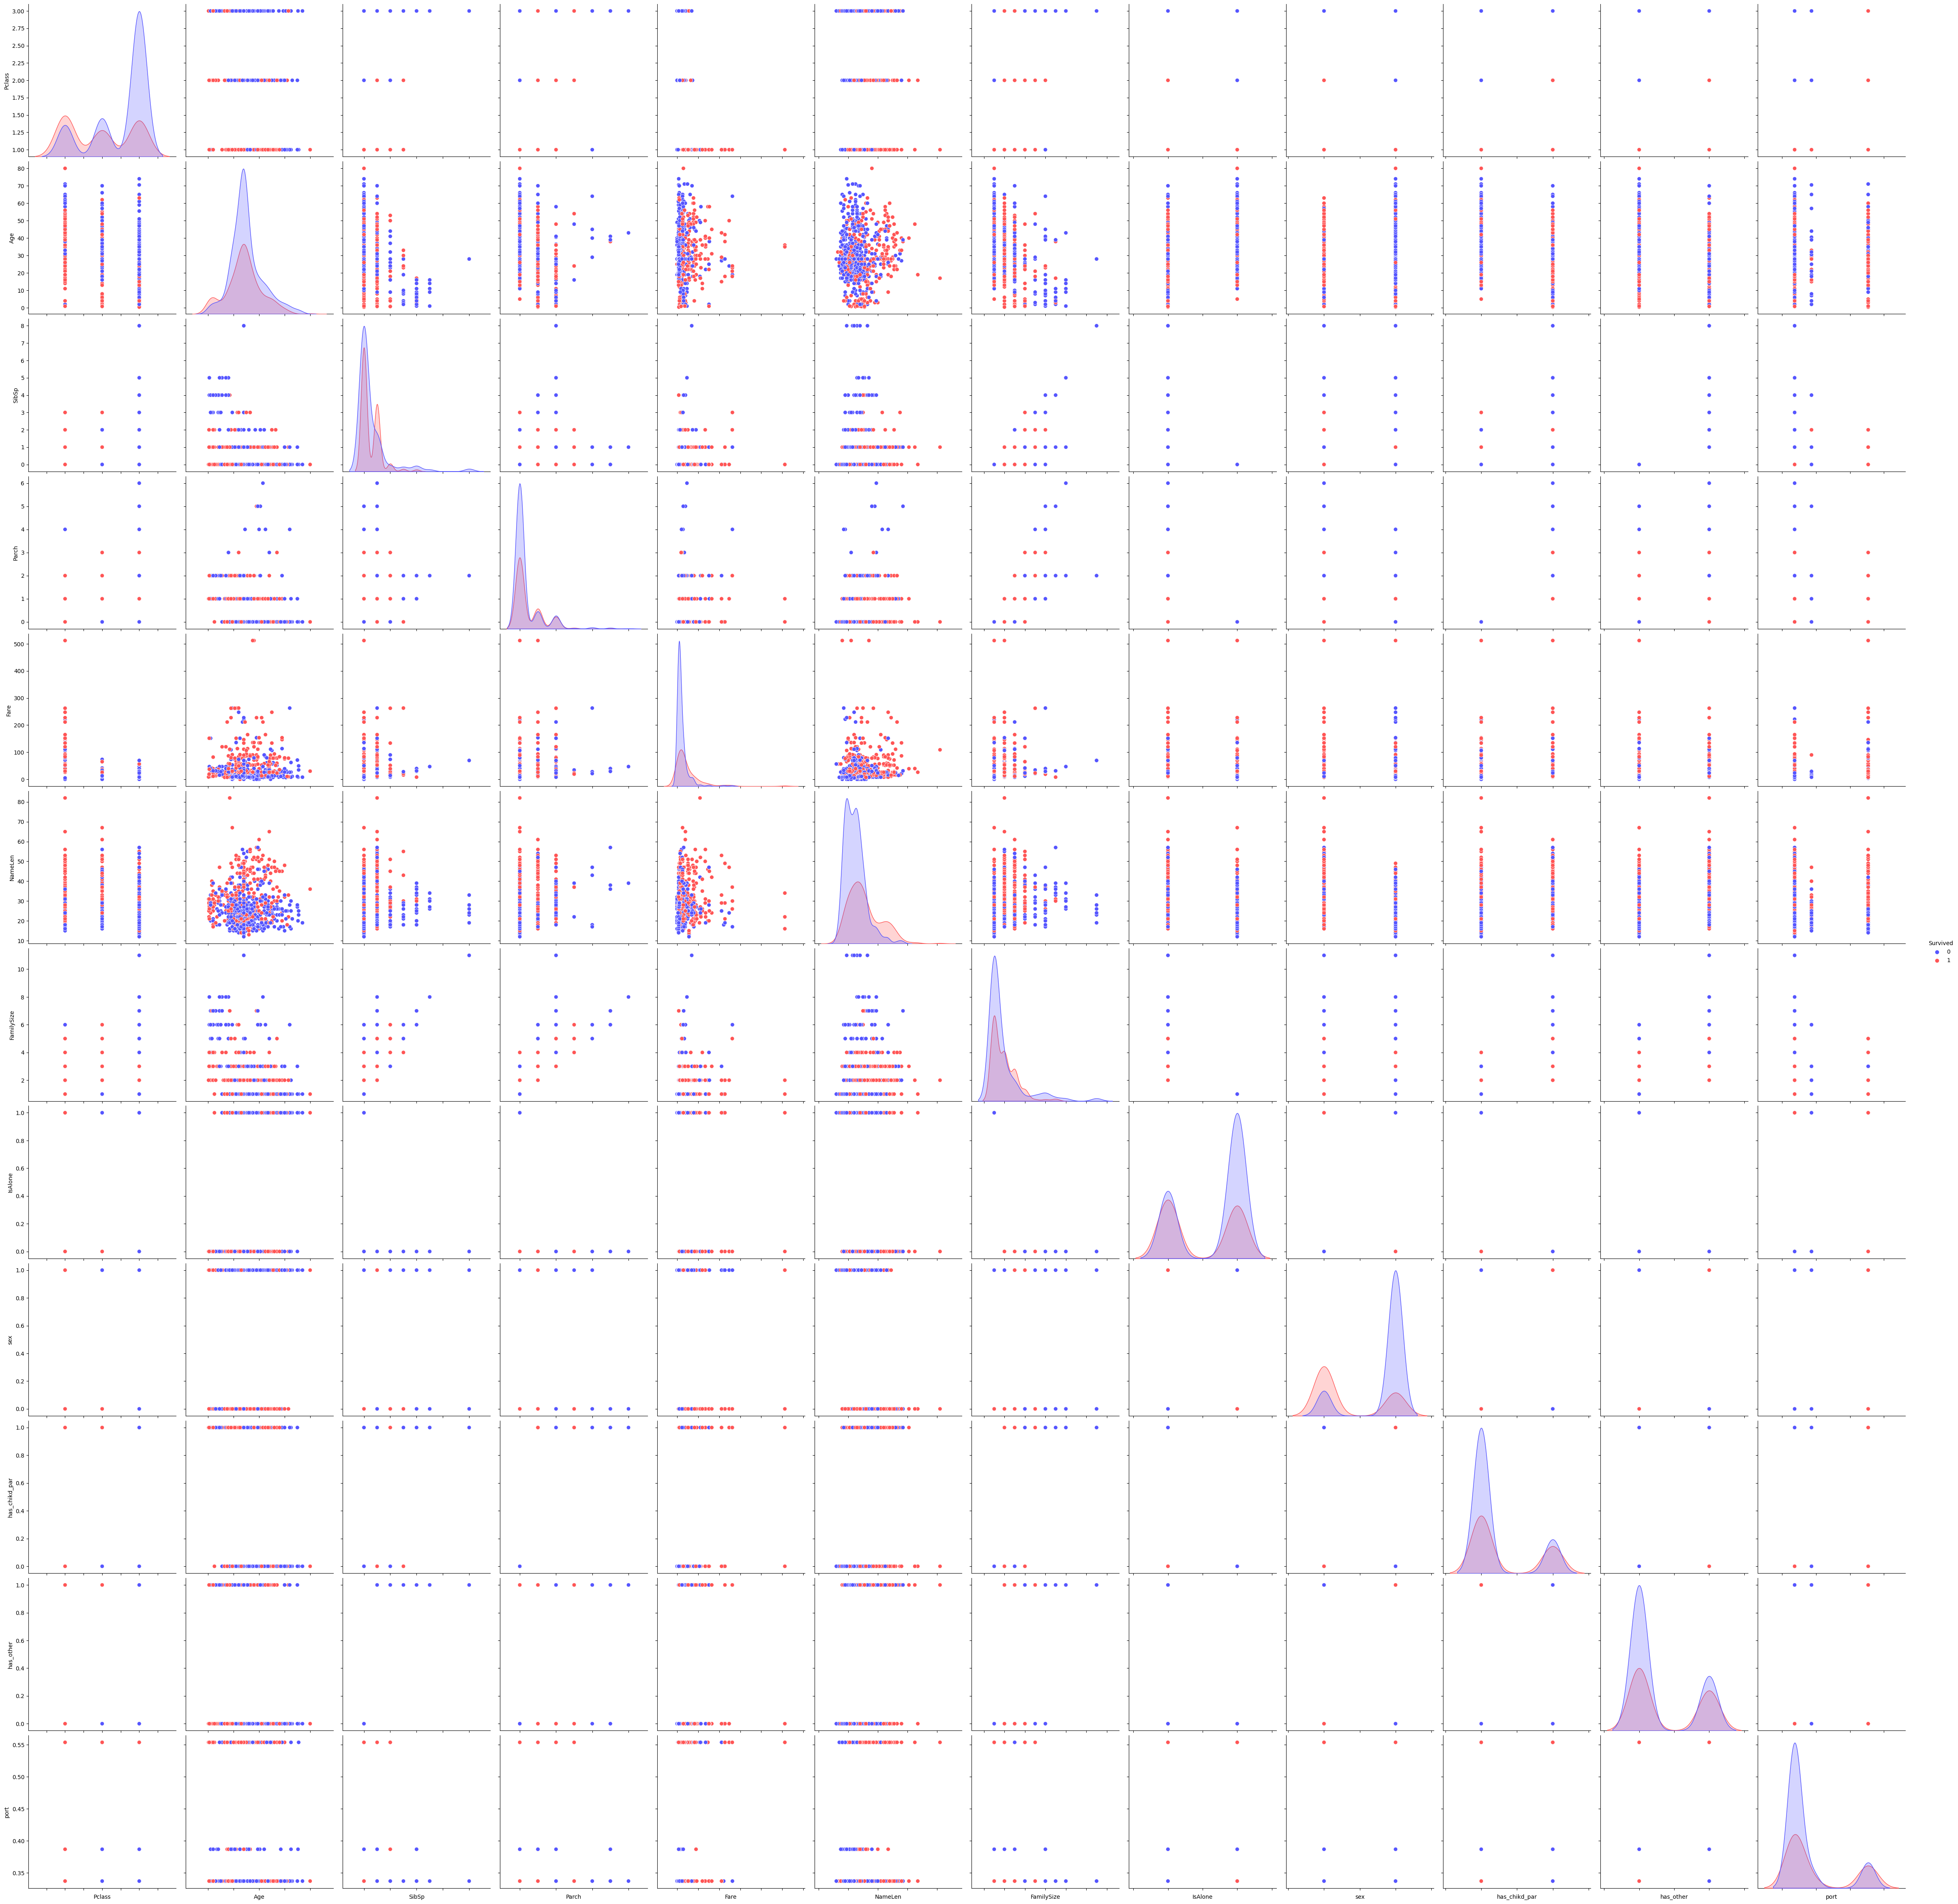

In [77]:
g = sns.pairplot(
    df_dop,
    hue='Survived',
    palette = 'seismic',
    height=4,
    diag_kind = 'kde',
    diag_kws=dict(fill=True),
    plot_kws=dict(s=50)
    )

g.set(xticklabels=[]);

Мы провели  однофакторный анализ данных и увидели, какие признаки сильно влияют на выживаемость, а какие нет.

Мы видим, что больше всего на выживаемость влияет пол пассажира, класс каюты. 
Из сомнительных зависимостей: длина имени пассажира (чем длинее, тем больше вероятность выжить)


### Наша собственная модель

Напишем свою модель, предсказывающую выживаемость только по признаку `Sex`.

In [80]:
def prediction(x):
    if x.sex == 1:
        return 0
    return 1

Посчитаем долю правильных ответов нашей модели.

In [83]:
from sklearn.metrics import accuracy_score

pred = df_dop.apply(lambda x: prediction(x), axis=1)

accuracy_score(df_dop['Survived'], pred)

0.7873303167420814

In [84]:
df_dop.groupby('sex', as_index=False).agg({'Survived': 'mean'})

,sex,Survived
0,0,0.741935
1,1,0.188153
